<a href="https://colab.research.google.com/github/hacersafak/HandsOn3/blob/main/437_FINAL_REPORT_2423457.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**Simulation of the Quantum Harmonic Oscillator Using Jordan-Wigner Mapping and Variational Algorithms**

**Abstract**

The aim of this project is to simulate the one-dimensional harmonic oscillator by using Jordan-Wigner mapping and variational quantum algorithms. The Hamiltonian was obtained and applied by employing Jordan-Wigner mapping to map the fermionic operators onto qubits. The Variational Quantum Eigensolver is employed to determine the ground-state energy. The Variational Quantum Deflation is used for determining the higher energy states. Trotterization is utilized to see the time evolution of the harmonic oscillator, and the impact of increasing the number of qubits is observed. Although, some of the findings of the project is consistent with theoretical information, there were issues with finding the correct results for higher energy states or higher number of qubits due to the implementation of the revised Hamiltonian or the methods.


**Introduction**

Quantum harmonic oscillator is a fundamental model in quantum physics, and it is an analogy of the classical harmonic oscillator which describes the motion of a mass m attached on a spring and released with a small angle. Quantum harmonic oscillator describes a system where the potential energy is proportional to the square of the displacement from equilibrium. It is quite significant since it models a wide range of physical systems, including molecular vibrations and solid-state phenomena. Also, the quantum harmonic oscillator is one of the few quantum-mechanical systems for which an exact, analytical solution is known.

Jordan-Wigner transformation allows us to map the fermionic operators onto qubits. 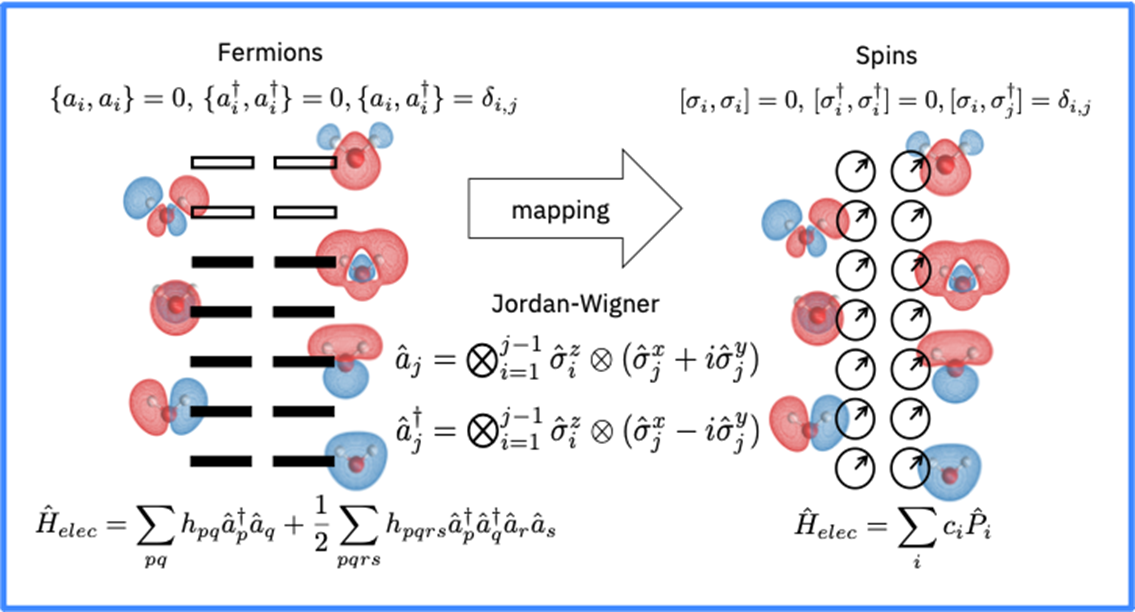 Variational Algorithms are essential for solving quantum problems. While Variational Quantum Eigensolver (VQE) is an algorithm which uses variational techniques to find the minimum eigenvalue of a given Hamiltonian operator, Variational Quantum Deflation (VQD) finds the k eigenvalues of the Hamiltonian of a given system. [1] Trotterization is a method in quantum computing that is used to approximate the time evolution of a quantum system. It divides the evolution governed by a Hamiltonian into smaller pieces and consists in the successive application of a quantum gate. [2]



**Methods**

Through this project, we used various quantum computing methods such as Jordan-Wigner mapping, variational quantum algorithms VQE and VQD, and trotterization.

To define the Hamiltonian we should have a look at the the time independent Schrödinger equation:
$$
H|\psi\rangle = E|\psi\rangle
$$

$$
    \frac{-ℏ^2}{2m}\frac{d^2 ψ}{dx^2}+ \frac{1}{2}mω^2 x^2 ψ=Eψ
$$
when, $$ V(x)=\frac{1}{2}mω^2 x^2 $$

Then, the corresponding energy values are $$ E_n= ℏw(n+\frac12) $$
We can also write this in terms of creation and annihilation operators as $$ E_n= ℏw(a^\dagger a+\frac12) $$ where creation operator is $$a^\dagger= \frac{X-iY}{2}  $$ and annihilation operator is $$a= \frac{X+iY}{2}  $$ and $$ a^\dagger a= \frac{I-Z}{2} $$ with I,X,Y and Z are Pauli gates.

An annihilation operator lowers the number of particles in a given state by one while a creation operator increases the number of particles in a given state by one.


In [ ]:
!pip install qiskit
!pip install qiskit-Aer
!pip install qiskit_algorithms
!pip install qiskit_nature
!pip install matplotlib
!pip install pylatexenc
!pip install qiskit-ibm-runtime
!pip install scipy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.7/6.7 MB 40.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 47.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.5/108.5 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 57.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.5/310.5 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 19.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 3.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136816 sha256=56ebb8c90dd6f384a2b9e180d64dd86a16fa7646a5b0bf3ea29249fa1582ce90
  Stored in d

In [ ]:
from qiskit import QuantumCircuit , assemble , transpile
from qiskit_aer import Aer , AerSimulator
from qiskit_nature.second_q.mappers import JordanWignerMapper
from qiskit_algorithms.optimizers import COBYLA, L_BFGS_B, SLSQP
from qiskit.primitives import Estimator , Sampler , StatevectorEstimator
from qiskit_algorithms import VQE ,VQD , TimeEvolutionProblem , TrotterQRTE
from qiskit.quantum_info import SparsePauliOp , Pauli , Statevector
from qiskit_nature.second_q.operators import FermionicOp
from qiskit.circuit.library import RealAmplitudes
from qiskit_algorithms.state_fidelities import ComputeUncompute
import numpy as np
import matplotlib.pyplot as plt


To write the Hamiltonian we employ "**fermionicOp**" which is used to represent a sum of fermionic annihilation/creation operators. And use **Jordan-Wigner** mapping to map the fermions onto qubits.  


In [ ]:
# defining hamiltonian with fermionicop
# H = hw(a†a + 1/2)
omega=1
fermionic_hamiltonian = FermionicOp(
    {
        "+_0 -_0": omega,  # a†a term with coefficient ω
        "": omega / 2      # Identity term with coefficient ω/2 (representing zero-point energy)
    },
)
mapper = JordanWignerMapper()
qubit_hamiltonian = mapper.map(fermionic_hamiltonian)

print(qubit_hamiltonian)

SparsePauliOp(['I', 'Z'],
              coeffs=[ 1. +0.j, -0.5+0.j])


Now, we create a quantum circuit.

In [ ]:
#construct the circuit
n_qubits = qubit_hamiltonian.num_qubits  # Number of qubits from the qubit Hamiltonian
qc = QuantumCircuit(n_qubits)


Now, we use the VQE to find the ground state energy. Theoretically, *ℏw*/2 is expected as the energy levels of harmonic oscillator is discrete.


In [ ]:
#VQE
ansatz = RealAmplitudes(n_qubits, reps=3)
optimizer = SLSQP(maxiter=2000)
estimator = Estimator()

def vqe_generate(ansatz, optimizer, estimator):
  vqe = VQE(estimator, ansatz, optimizer)
  backend = AerSimulator()
  result = vqe.compute_minimum_eigenvalue(qubit_hamiltonian)
  return result.eigenvalue.real

a=vqe_generate(ansatz, optimizer, estimator)
print(a)

0.5000001178505811


<ipython-input-9-7c343657afba>:4: DeprecationWarning: The class ``qiskit.primitives.estimator.Estimator`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseEstimatorV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Estimator` class is `StatevectorEstimator`.
  estimator = Estimator()


For higher energy states, we employ VQD.

In [ ]:
#VQD

estimator = Estimator()
sampler = Sampler()

k = 4  # Number of states to find (ground state + excited states)
eigenvalues = []

fidelity = ComputeUncompute(sampler)  # Example: Using ComputeUncompute fidelity


vqd = VQD(estimator, fidelity, ansatz, optimizer, k=k)
result = vqd.compute_eigenvalues(operator=qubit_hamiltonian)
vqd_values = result.eigenvalues
print(vqd_values)


<ipython-input-10-3fcc4a3ee2f4>:3: DeprecationWarning: The class ``qiskit.primitives.estimator.Estimator`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseEstimatorV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Estimator` class is `StatevectorEstimator`.
  estimator = Estimator()
<ipython-input-10-3fcc4a3ee2f4>:4: DeprecationWarning: The class ``qiskit.primitives.sampler.Sampler`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseSamplerV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Sampler` class is `StatevectorSampler`.
  sampler = Sampler()


[ 0.50000046+0.j  1.49999981+0.j 15.49999637+0.j 16.50000389+0.j]


/usr/local/lib/python3.10/dist-packages/matplotlib/cbook.py:1709: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/usr/local/lib/python3.10/dist-packages/matplotlib/transforms.py:757: ComplexWarning: Casting complex values to real discards the imaginary part
  points = np.asarray(points, float)


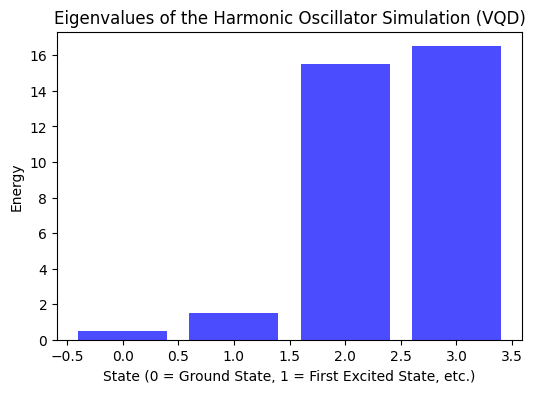

In [ ]:
# Plotting the eigenvalues
import matplotlib.pyplot as plt

# Assuming vqd_values contains the computed eigenvalues
plt.figure(figsize=(6, 4))
plt.bar(range(len(vqd_values)), vqd_values, color='blue', alpha=0.7)
plt.xlabel('State (0 = Ground State, 1 = First Excited State, etc.)')
plt.ylabel('Energy')
plt.title('Eigenvalues of the Harmonic Oscillator Simulation (VQD)')
plt.show()

To see the time evolution of the harmonic oscillator, we use Trotterization.

<ipython-input-13-e01393698625>:22: DeprecationWarning: The class ``qiskit.primitives.estimator.Estimator`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseEstimatorV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Estimator` class is `StatevectorEstimator`.
  estimator = Estimator()


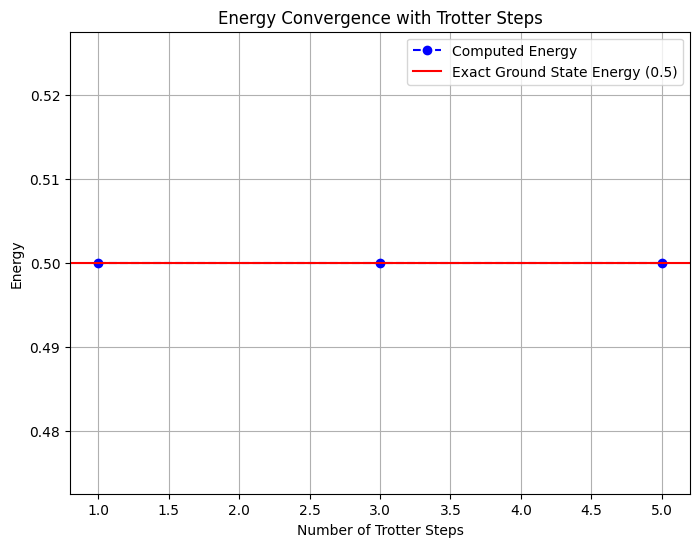

Statevector([ 0.05001875-0.70533547j, -0.56649408-0.42318371j],
            dims=(2,))


In [ ]:


# Define the Hamiltonian parameters
omega = 1.0  # Angular frequency
n_qubits = 1  # Single harmonic oscillator

# Define the Hamiltonian in SparsePauliOp form for a single qubit (harmonic oscillator model)
# H = omega * (a†a + 1/2) -> mapped to Pauli operators
hamiltonian = SparsePauliOp.from_list([("Z", omega / 2), ("I", omega / 2)])

# Prepare the initial state (ground state of the harmonic oscillator)
qc = QuantumCircuit(n_qubits)
qc.h(0)  # Example initial state (apply Hadamard for simplicity, use Fock state for true harmonic oscillator ground state)
qc_for_statevector = qc.copy()
qc_for_statevector.remove_final_measurements()  # Ensure no measurement in the copied circuit
initial_state = Statevector(qc_for_statevector)

# Define parameters for Trotter evolution
time = 1.0  # Total evolution time
trotter_steps_list = [1, 3, 5]  # Number of Trotter steps to test
energies = []  # To store computed energies

# Create the estimator for computing expectation values
estimator = Estimator()

# Perform time evolution and compute energies
for steps in trotter_steps_list:
    # Create the Trotterized evolution algorithm
    trotter = TrotterQRTE(num_timesteps=steps, estimator=estimator)

    # Define the time evolution problem
    problem = TimeEvolutionProblem(
        hamiltonian=hamiltonian,
        time=time,
        aux_operators=[hamiltonian],  # Include Hamiltonian to compute its expectation value
        initial_state=initial_state,
    )

    # Solve the problem
    result = trotter.evolve(problem)
    evolved_state = Statevector(result.evolved_state)

    # Compute the expectation value of the Hamiltonian
    energy = evolved_state.expectation_value(hamiltonian).real
    energies.append(energy)

# Plot the results
plt.figure(figsize=(8, 6))
plt.plot(trotter_steps_list, energies, marker="o", linestyle="--", color="blue", label="Computed Energy")
plt.axhline(y=omega / 2, color="red", linestyle="-", label="Exact Ground State Energy (0.5)")
plt.xlabel("Number of Trotter Steps")
plt.ylabel("Energy")
plt.title("Energy Convergence with Trotter Steps")
plt.legend()
plt.grid()
plt.show()

print(statevector)

Finally, we look at the impact of increasing the number of qubits which would mean the harmonic oscillator to be more than one-dimension.

Generated Hamiltonian for 1 qubits:
Fermionic Operator
number spin orbitals=1, number terms=2
  1.0 * ( +_0 -_0 )
+ 0.5
--------------------------------------------------


<ipython-input-16-508b689f3b13>:38: DeprecationWarning: The class ``qiskit.primitives.estimator.Estimator`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseEstimatorV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Estimator` class is `StatevectorEstimator`.
  estimator = Estimator()
<ipython-input-16-508b689f3b13>:46: DeprecationWarning: The class ``qiskit.primitives.sampler.Sampler`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseSamplerV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Sampler` class is `StatevectorSampler`.
  vqd = VQD(estimator, ComputeUncompute(Sampler()), ansatz, optimizer, k=k)


Generated Hamiltonian for 2 qubits:
Fermionic Operator
number spin orbitals=2, number terms=3
  1.0 * ( +_0 -_0 )
+ 0.5
+ 1.0 * ( +_1 -_1 )
--------------------------------------------------


<ipython-input-16-508b689f3b13>:38: DeprecationWarning: The class ``qiskit.primitives.estimator.Estimator`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseEstimatorV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Estimator` class is `StatevectorEstimator`.
  estimator = Estimator()
<ipython-input-16-508b689f3b13>:46: DeprecationWarning: The class ``qiskit.primitives.sampler.Sampler`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseSamplerV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Sampler` class is `StatevectorSampler`.
  vqd = VQD(estimator, ComputeUncompute(Sampler()), ansatz, optimizer, k=k)


Generated Hamiltonian for 3 qubits:
Fermionic Operator
number spin orbitals=3, number terms=4
  1.0 * ( +_0 -_0 )
+ 0.5
+ 1.0 * ( +_1 -_1 )
+ 1.0 * ( +_2 -_2 )
--------------------------------------------------


<ipython-input-16-508b689f3b13>:38: DeprecationWarning: The class ``qiskit.primitives.estimator.Estimator`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseEstimatorV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Estimator` class is `StatevectorEstimator`.
  estimator = Estimator()
<ipython-input-16-508b689f3b13>:46: DeprecationWarning: The class ``qiskit.primitives.sampler.Sampler`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseSamplerV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Sampler` class is `StatevectorSampler`.
  vqd = VQD(estimator, ComputeUncompute(Sampler()), ansatz, optimizer, k=k)


Generated Hamiltonian for 4 qubits:
Fermionic Operator
number spin orbitals=4, number terms=5
  1.0 * ( +_0 -_0 )
+ 0.5
+ 1.0 * ( +_1 -_1 )
+ 1.0 * ( +_2 -_2 )
+ 1.0 * ( +_3 -_3 )
--------------------------------------------------


<ipython-input-16-508b689f3b13>:38: DeprecationWarning: The class ``qiskit.primitives.estimator.Estimator`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseEstimatorV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Estimator` class is `StatevectorEstimator`.
  estimator = Estimator()
<ipython-input-16-508b689f3b13>:46: DeprecationWarning: The class ``qiskit.primitives.sampler.Sampler`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseSamplerV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Sampler` class is `StatevectorSampler`.
  vqd = VQD(estimator, ComputeUncompute(Sampler()), ansatz, optimizer, k=k)
/usr/local/lib/python3.10/dist-packages/matplotlib/cbook.py:1709: ComplexWarning: Casting complex values to real discards the 

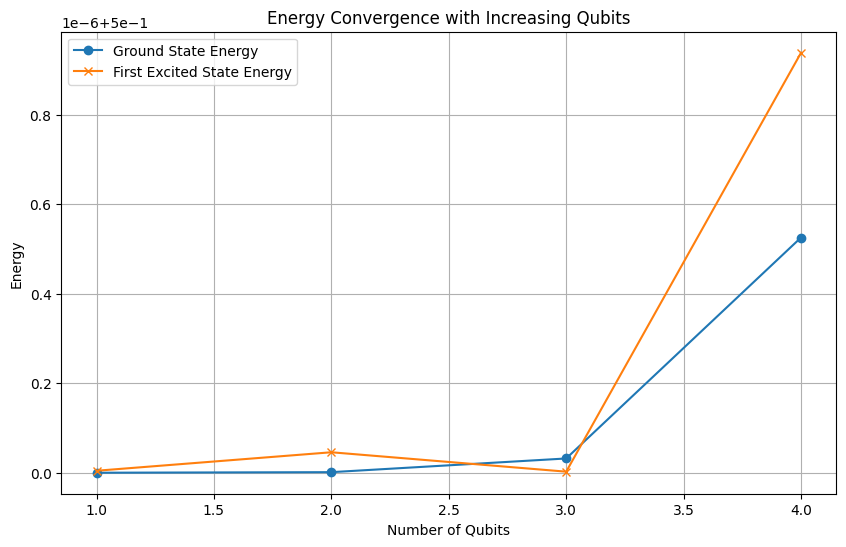

In [ ]:
import matplotlib.pyplot as plt



# Store ground state and excited state energies for each qubit number
ground_state_energies = []
excited_state_energies = []


# Define base parameters for the Hamiltonian
omega = 1.0  # Example parameter

# Number of qubits to test
qubit_numbers = [1, 2, 3, 4]  # Example list of qubit numbers

for n_qubits in qubit_numbers:
    terms = {}  # Initialize terms for the Fermionic Hamiltonian

    # Add terms dynamically based on the number of qubits
    for i in range(n_qubits):
        terms[f"+_{i} -_{i}"] = omega  # Diagonal term
        terms[""] = terms.get("", 0) + omega / (2 * n_qubits)  # Constant energy term, scaled with n_qubits

    # Create the Fermionic Hamiltonian
    fermionic_hamiltonian = FermionicOp(terms)

    # Print or analyze the generated Hamiltonian
    print(f"Generated Hamiltonian for {n_qubits} qubits:")
    print(fermionic_hamiltonian)
    print("-" * 50)


    mapper = JordanWignerMapper()
    qubit_hamiltonian = mapper.map(fermionic_hamiltonian)

    ansatz = RealAmplitudes(n_qubits, reps=2)
    optimizer = SLSQP(maxiter=2000)
    estimator = Estimator()

    # VQE for ground state
    ground_state_energy = vqe_generate(ansatz, optimizer, estimator)
    ground_state_energies.append(ground_state_energy)

    # VQD for excited states
    k = 3  # Number of excited states to compute
    vqd = VQD(estimator, ComputeUncompute(Sampler()), ansatz, optimizer, k=k)
    vqd_result = vqd.compute_eigenvalues(operator=qubit_hamiltonian)
    excited_state_energies.append(vqd_result.eigenvalues)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(qubit_numbers, ground_state_energies, label="Ground State Energy", marker='o')
plt.plot(qubit_numbers, [v[0] for v in excited_state_energies], label="First Excited State Energy", marker='x')
plt.xlabel('Number of Qubits')
plt.ylabel('Energy')
plt.title('Energy Convergence with Increasing Qubits')
plt.legend()
plt.grid(True)
plt.show()



**Results**

As expected the result of Jordan-Wigner mapping gives us a SparsePauliOp with I,Z with coefficients.


The ground state energy of one-dimensional harmonic oscillator due to VQE is 0.5000001178505811, for simplicity we choose w and ℏ as 1. This result is consistent with the theory.


For higher energy states, my VQD code only works for k<2. I assume this error is due to my implementation of VQD. Here's the plotted eigenvalues. This graph is only valid for the ground state and first excited state.
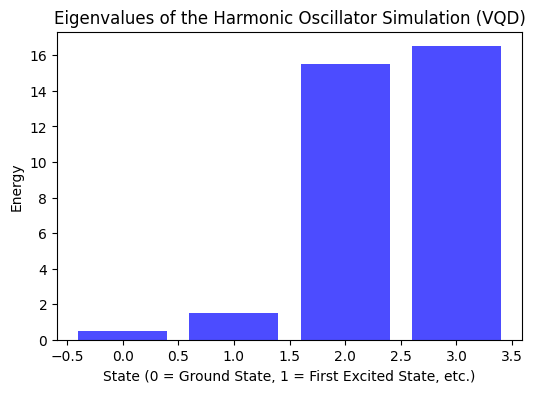

Here in the graph below we see the results of Trotterization for steps 1, 3 and 5. This result is valid since we do not expect to see a change in the ground state energy of the harmonic oscillator as the time evolves. 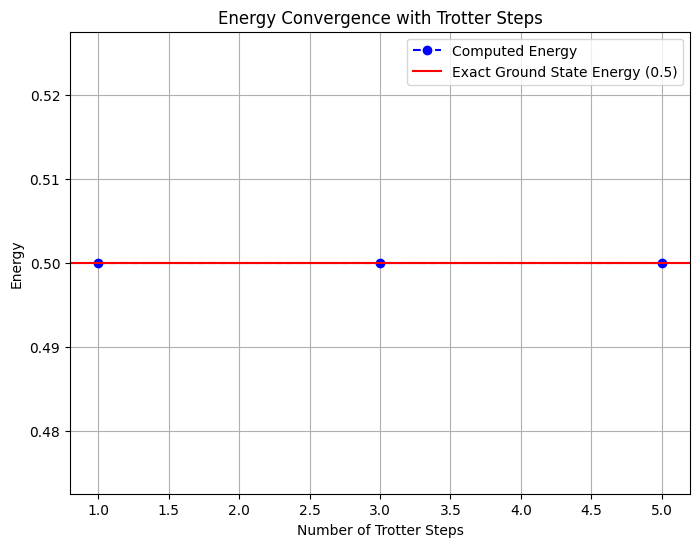

In the graph below, we see the energy convergence with increasing qubits. Increasing the number of qubits mean increasing the dimension of the harmonic oscillator. However, the graph is not correct. Because, what we expect to see was a gradual increase rather than sudden fluctuations as we know that the energy states of harmonic oscillator is discrete and it increases by hw/2. This error is probably because of the fact that I was not able to write the Hamiltonian for n dimensional harmonic oscillators properly.

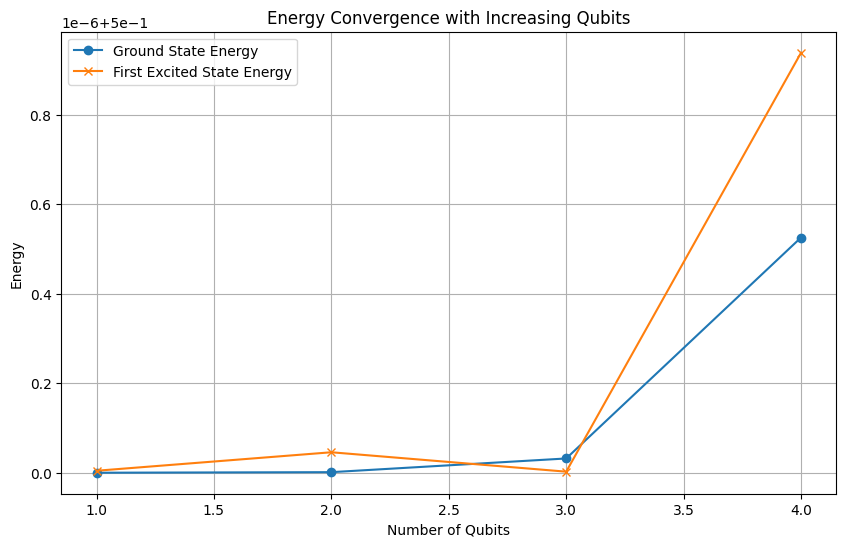

**Conclusion**

To sum up, this project explored the simulation of one-dimensional harmonic oscillator using quantum computing methods such as Jordan-Wigner mapping, variational quantum algorithms and trotterization method. Hamiltonian is obtained by theoretical information and Jordan-Wigner mapping was employed to assign the behavior of the system and work with quantum computing tools. By employing the Variational Quantum Eigensolver, the expected ground-state energy of the harmonic oscillator was successfully verified. We also calculated the higher energy states using the Variational Quantum Deflation Algorithm, but achieved partial success. Time evolution was observed through Trotterization with success since we did not see a change in the ground state energy. Futhermore, we looked at the effect of increasing the dimension of the harmonic oscillator with poor results such as a growing ground-state energy and non-constant energy gaps, which is not in accordance with the theoretical predictions. These discrepancies highlight potential areas for improvement in the methodology, including revising the Hamiltonian for the n dimensional harmonic oscillator and refining Trotterization steps. Overall, using quantum computing to observe the behaviour of a harmonic oscillator through a a simulation, helps us to understand the quantum concepts better.



**References**

[1] VQE - Qiskit Algorithms 0.3.0. Github.io. https://qiskit-community.github.io/qiskit-algorithms/stubs/qiskit_algorithms.VQE.html.
‌

[2] Quantum Real Time Evolution using Trotterization - Qiskit Algorithms 0.3.1. Github.io. https://qiskit-community.github.io/qiskit-algorithms/tutorials/13_trotterQRTE.html (accessed 2025-01-12).
‌

[3] FermionicOp - Qiskit Nature 0.7.2. Github.io. https://qiskit-community.github.io/qiskit-nature/stubs/qiskit_nature.second_q.operators.FermionicOp.html (accessed 2025-01-12).
‌

[4] Mapping to the Qubit Space - Qiskit Nature 0.7.2. qiskit-community.github.io. https://qiskit-community.github.io/qiskit-nature/tutorials/06_qubit_mappers.html.
‌

[5] David Jeffrey Griffiths; Schroeter, D. F.; Cambridge University Press. Introduction to Quantum Mechanics, 3rd ed.; Cambridge University Press: Cambridge, 2018.

[6] Github Code: https://github.com/hacersafak/HandsOn3/blob/main/PHYS437_PROJECTCODE_2423457_HACER_SAFAK.ipynb (accessed 2025-01-12).
‌
‌

Hacer Şafak
2423457

Phys437